In [1]:
import requests    
import pandas as pd

In [2]:
def methode1position(t1="08:45",t2="09:46"):
   url = "https://cartobat.com/434152544F42415450616C616973656175/getRawDataForCartoWear/E91FBA6564D2/2022-09-23%20"+t1+":00.000/2022-11-25%20"+t2+":00.000"

   reponse = requests.get(url)
   print(reponse)
   contenu = reponse.json()
   print(type(contenu))
   
   test = pd.DataFrame(contenu['resultat'])
   test["macModule"].unique()
   test["date"] = pd.to_datetime(test["timestamp"])
   test = test.sort_values('timestamp').reset_index()
   test['Time'] = pd.to_datetime(test['date']).dt.time
   test['hourMinute'] = test.date.dt.hour.astype(str) + 'h' + test.date.dt.minute.astype(str)
   test=test.drop(columns=["timestamp","date","Time","index"])

   my_map={'A8032A31204E':"A8032A31204E_29m", 'C45BBE37B346':"C45BBE37B346_52m", 'C45BBE39F9AE':"C45BBE39F9AE_13m", 'A8032A311FAA':"A8032A311FAA_4m",
       'C45BBE39F56A':"C45BBE39F56A_56m", 'C45BBE386952':"C45BBE386952_65m", 'C45BBE384CD2':"C45BBE384CD2_89m", 'C45BBE386362':"C45BBE386362_80m"}
   test["macModule"]=test["macModule"].map(my_map)

   my_map_dist={"A8032A31204E_29m":29,"C45BBE37B346_52m":52,"C45BBE39F9AE_13m":13, "A8032A311FAA_4m":4,
       "C45BBE39F56A_56m":56, "C45BBE386952_65m":65, "C45BBE384CD2_89m":89, "C45BBE386362_80m":80}
   test["Positions"]=test["macModule"].map(my_map_dist)
   INDEX=test["rssi"].sort_values(ascending=False).index
   sq=test.iloc[INDEX[0]]["Positions"]
   return sq

In [ ]:
methode1position(t1="08:45",t2="09:46")

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
list_capteurs = ['C45BBE384CD2', 'C45BBE386362', 'C45BBE386952', 'C45BBE39F56A', 'C45BBE39F9AE', 'A8032A31204E', 'C45BBE37B346']
list_capteurs_dist = {'C45BBE384CD2' : 89, 'C45BBE386362' : 80, 'C45BBE386952' : 65, 'C45BBE39F56A' : 56, 'C45BBE39F9AE' : 13, 'A8032A31204E' : 29, 'C45BBE37B346' : 52}

In [15]:
def Position_methode_1(list_capteurs):
    L = []
    for metre in range(91):
        M = []
        for capteur in list_capteurs:
            try:
                df = pd.DataFrame(pd.read_csv('../Selected/'+capteur+'.csv')[str(metre)])
            except:
                continue
            for index, row in df.iterrows():
                for col in df:
                    if row[0]>=df[col].max():
                        L.append(list_capteurs_dist[capteur])
    return L

In [16]:
y = Position_methode_1(list_capteurs)

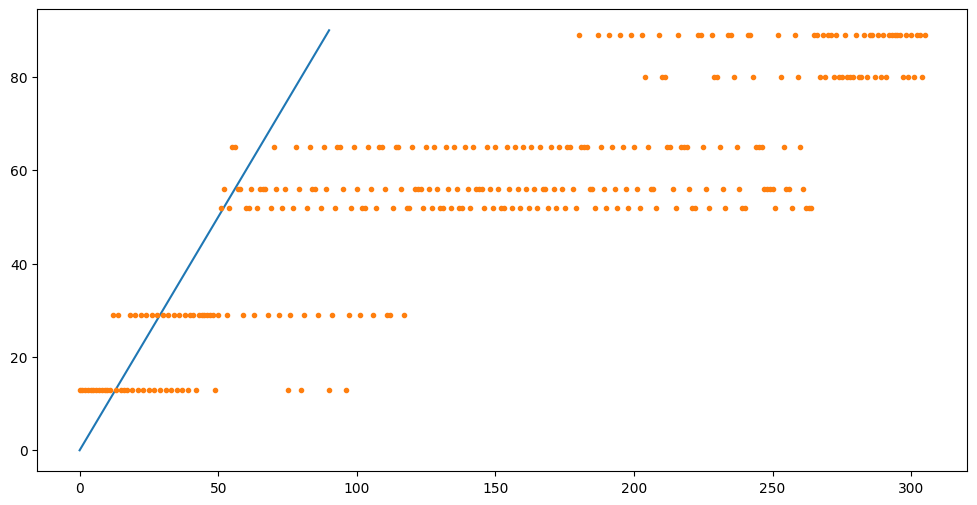

In [17]:
x = [i for i in range(91)]
plt.plot(x)
plt.plot(y, '.')

## Régression Linéaire

In [18]:
import statsmodels.api as sm
import numpy as np
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
X = np.column_stack((x))
X=X.transpose()
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

Text(0, 0.5, 'position estimée')

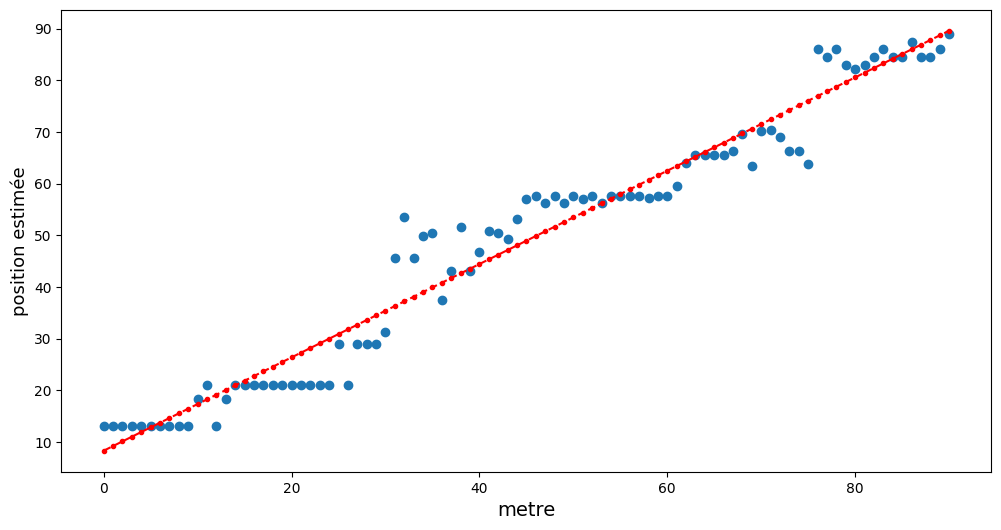

In [ ]:
plt.plot(x, y, 'o', label="données")
plt.plot(x, results.fittedvalues, 'r--.', label="droite de régression")
plt.xlabel("metre",fontsize=14); 
plt.ylabel('position estimée',fontsize=13)

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1920.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           5.01e-62
Time:                        09:30:19   Log-Likelihood:                -277.57
No. Observations:                  91   AIC:                             559.1
Df Residuals:                      89   BIC:                             564.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2816      1.074      7.707      0.0

In [ ]:
print('Paramètres de la régression: ', results.params)
print('R2: ', results.rsquared)
print('s: ', np.sqrt(results.mse_resid))
print('intervalles de confiance b0 95% : ', results.conf_int(.05)[0])
print('intervalles de confiance b1 95% : ', results.conf_int(.05)[1])

Paramètres de la régression:  [8.28157195 0.90360246]
R2:  0.9557015750033591
s:  5.167263792443441
intervalles de confiance b0 95% :  [ 6.14659338 10.41655052]
intervalles de confiance b1 95% :  [0.86262843 0.94457648]
